In [1]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

In [22]:
# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

er = ((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tX = 11.86*np.cos(2*np.pi/0.81*Tx-1.32) + 0.64*Tx+4*er
tY = -32.14*np.cos(2*np.pi/0.75*Ty-1.94) + 0.15*Ty+7*er

We now have two sets of data: Tx and Ty, the time series, and tX and tY, sinusoidal data with noise.<br /> 
We are interested in finding the frequency of the sine wave.

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.2, 0.1, 'x freq :  1.321 kHz')

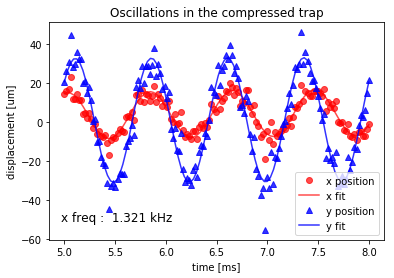

In [42]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-", alpha=.7)

# Fit the second set
p0 = [-15., .8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-", alpha=.8)

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

text_prop1=[.2, .1, 'x freq :  %.3f kHz' % (1/p[0])]
text_prop2=dict(fontsize=12,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
plt.text(*text_prop1, **text_prop2)

Let's say we already know the first parameters for multiple lines are the same, <br/>
and we don't know the others. We aim to estimate those parameters all at once by creating a little more complicated error function s.t.

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.2, 0.1, 'x freq :  1.321 kHz')

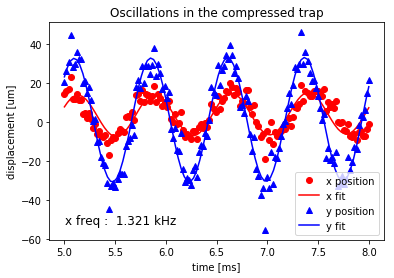

In [43]:
fitfunc = lambda T, p, x: p[0]*np.cos(2*np.pi/T*x+p[1]) + p[2]*x
p1 = r_[-15., 0., -1.]
p2 = r_[-15., 0., -1.]
T = .8 # Initial guess for the common period
p = r_[T, p1, p2]
errfunc = lambda p, x1, y1, x2, y2: r_[
                fitfunc(p[0], p[1:4], x1) - y1,
                fitfunc(p[0], p[4:7], x2) - y2
            ]
# This time we need to pass the two sets of data, there are thus four "args".
p,success = optimize.leastsq(errfunc, p, args=(Tx, tX, Ty, tY))
time = np.linspace(Tx.min(), Tx.max(), 100) # Plot of the first data and the fit
plt.plot(Tx, tX, "ro", time, fitfunc(p[0], p[1:4], time),"r-")

# Plot of the second data and the fit
time = np.linspace(Ty.min(), Ty.max(),100)
plt.plot(Ty, tY, "b^", time, fitfunc(p[0], p[4:7], time),"b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()
plt.text(*text_prop1, **text_prop2)

Simplifying the syntax

In [52]:
class Parameter:
    def __init__(self, value):
            self.value = value

    def set(self, value):
            self.value = value

    def __call__(self):
            return self.value

def fit(function, parameters, y, x = None):
    def f(params):
        i = 0
        for p in parameters:
            p.set(params[i])
            i += 1
        return y - function(x)

    y = np.array(y)
    if x is None: x = np.arange(y.shape[0])
    p = [param() for param in parameters]
    return optimize.leastsq(f, p)

In [53]:
# giving initial parameters
mu = Parameter(7)
sigma = Parameter(3)
height = Parameter(5)
mu.set(8)

print(mu(), sigma(), height())
# define your function:
def f(x): return height() * np.exp(-((x-mu())/sigma())**2)

# fit! (given that data is an array with the data to fit)
data = 10*np.exp(-np.linspace(0, 10, 100)**2) + np.random.rand(100)
fit(f, [mu, sigma, height], data)

8 3 5


(array([-1.13876781, 11.6883806 , 10.66227483]), 1)

Indice

In [54]:
x = np.arange(20).reshape(5, 4);x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [65]:
x[np.indices((2, 3))]

array([[[[ 0,  1,  2,  3],
         [ 0,  1,  2,  3],
         [ 0,  1,  2,  3]],

        [[ 4,  5,  6,  7],
         [ 4,  5,  6,  7],
         [ 4,  5,  6,  7]]],


       [[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]])

Adding extra blacket [] makes it change from pairwise selecting to just indicing arrray and putting it all together.

In [71]:
x[[[[0,0,0],[1,1,1]]]] 

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]],

       [[4, 5, 6, 7],
        [4, 5, 6, 7],
        [4, 5, 6, 7]]])

In [59]:
r,c=np.indices((2, 3)); x[r, c]

array([[0, 1, 2],
       [4, 5, 6]])

In [60]:
np.indices((2, 3))

array([[[0, 0, 0],
        [1, 1, 1]],

       [[0, 1, 2],
        [0, 1, 2]]])

In [100]:
np.array([[1,2],[3,4]]).sum()

10

https://scipy-cookbook.readthedocs.io/items/FittingData.html

In [224]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(-(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

# what is moments function for???
def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    X, Y = np.indices(data.shape)
    #shape 201 x 201
    #total => 35064.683386257726
    #X=>[[0,0,...,0,0],[1,1,...,1,1],...,[200,200,...,200,200]]   => 201 x 201
    #Y=>[[0,1,...,199,200],[0,1,...,199,200],...,[0,1,...,199,200]]    => 201 x 201
    total = data.sum()
    x = (X*data).sum()/total # Single value => x center
    y = (Y*data).sum()/total # Single value => y center
    #
    col = data[:, int(y)] # 201 x 1
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    print(width_x,'is width_x')
    row = data[int(x), :] # 1 x 201
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    #
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

39.76880053690385 is width_x


Text(0.95, 0.05, '\nx : 100.1\ny : 100.2\nwidth_x : 34.6\nwidth_y : 55.2')

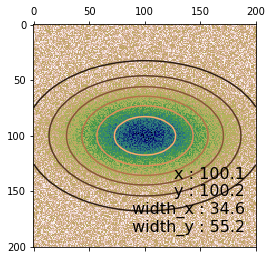

In [225]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:201, 0:201]
data = gaussian(3, 100, 100, 20, 40)(Xin, Yin) + np.random.random(Xin.shape)
#data => 201 x 201 

plt.matshow(data, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data)
fit = gaussian(*params)
xy = fit(*np.indices(data.shape))
plt.contour(xy, cmap=plt.cm.copper)

ax = plt.gca()
(height, x, y, width_x, width_y) = params
plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

In [198]:
x = np.reshape(np.r_[0:8:9j], (3,3))+np.full(3,10)
o = np.ones((3,3))
print(x)
print(x*x)
print(x*o)

[[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]
[[100. 121. 144.]
 [169. 196. 225.]
 [256. 289. 324.]]
[[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]


In [199]:
c=np.reshape([0,1,2]*3,(3,3)).T;c

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [200]:
#x=np.random.randn(3,3)

In [201]:
X,Y=np.indices((3,3))
print(X,'\n\n',Y)

[[0 0 0]
 [1 1 1]
 [2 2 2]] 

 [[0 1 2]
 [0 1 2]
 [0 1 2]]


In [202]:
ttl=x.sum();ttl

126.0

In [203]:
(X*x).sum()/ttl

1.1428571428571428

In [204]:
(Y*x).sum()/ttl

1.0476190476190477

In [205]:
x

array([[10., 11., 12.],
       [13., 14., 15.],
       [16., 17., 18.]])

In [206]:
np.array([0,1,2])+np.full(3,2)

array([2, 3, 4])

In [134]:
c+np.full(3,2)

array([[2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [144]:
 total = data.sum()
    x = (X*data).sum()/total # Single value => x center
    y = (Y*data).sum()/total

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

Finding the minimimum within boundaries.<br/>
Function is supposed by Scipy special

Text(0.5, 1.0, 'Different Bessel functions and their local maxima')

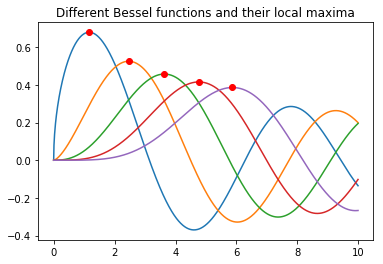

In [245]:
from scipy import special

x = arange(0,10,0.01)

for k in arange(0.5,5.5):
    y = special.jv(k, x)
    plt.plot(x, y)
    f = lambda x: -special.jv(k,x)
    x_max = optimize.fminbound(f, 0,6)
    plt.plot([x_max], [special.jv(k, x_max)], 'ro')

title('Different Bessel functions and their local maxima')